In [1]:
#import library
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import re 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk as nlp
import nltk.corpus
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
# Twitter API Credentials 
consumer_key = 'hwYPVyirt8FlQ1BDixIGaDiAU'
consumer_secret = 'HKQ0tAkSe4jPyaKS2N98QliCPq6RgFDeDGixSp846BrzpH8syX'
access_token = '2979938072-i0vjtgap34jBbjANoFrIZeVgszQHRFaCnVg40YP'
access_secret = 'aEc99tzfU1NJ5cwFDA1yeiTAHhuaChCqTsFRMOkDWj32z'

In [3]:
# Create the authentication object 
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and access token secret
authenticate.set_access_token(access_token, access_secret)

# Create the API object while passing in the auth information 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extact 100 tweets from twitter user
posts = api.user_timeline(screen_name = "@BillGates", count = 500, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

2) RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

3) RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…

4) RT @ClintSmithIII: When I think of emancipation, I think of all of the people who fought for freedom but who never got a chance to experien…

5) RT @kcarterjackson: Happy Juneteenth fam! My latest for the @TheAtlantic. Find joy today! The images from the article alone are giving me l…



In [5]:
# Create dataframe 
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data 
df.head()

,Tweets
0,RT @MichelleObama: Here's what #Juneteenth mea...
1,RT @NavigatingNikki: “It’s that clarity of lan...
2,"RT @nationalbook: ""And I’ll never lose my fait..."
3,RT @ClintSmithIII: When I think of emancipatio...
4,RT @kcarterjackson: Happy Juneteenth fam! My l...


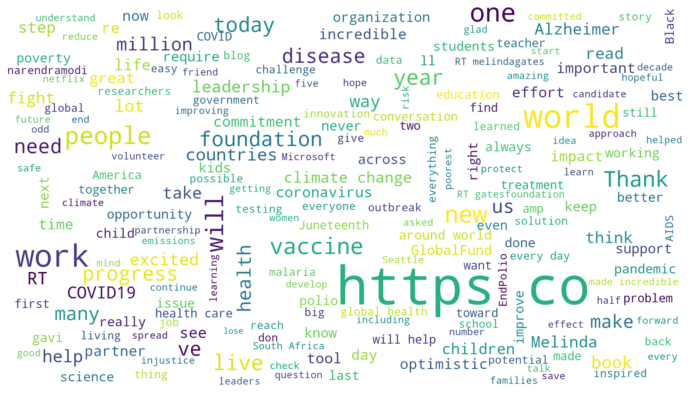

In [6]:
# Plot the word cloud 
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('tweet_wordcloud.png')
plt.show()

In [7]:
# Create a list and for-loop to clean the tweets and store it into a new variable called cleaned_tweet
cleaned_tweet_list = []
for cleaned_tweet in df.Tweets:
    cleaned_tweet = cleaned_tweet.lower() # convert tweet to lowercase 
    cleaned_tweet = re.sub(r'@[A-Za-z0-9-_]+', '', cleaned_tweet) # Removed @mentions
    cleaned_tweet = re.sub(r"'[A-Za-z0-9-_]+", '', cleaned_tweet) # Removed 's
    cleaned_tweet = re.sub(r'#[A-Za-z0-9-_]+', '', cleaned_tweet) # Removed the '#' symbol
    cleaned_tweet = re.sub(r'rt[\s]+', '', cleaned_tweet) # Removing RT
    cleaned_tweet = re.sub(r'https?:\/\/\S+', '', cleaned_tweet) # Remove the hyper link
    cleaned_tweet = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", cleaned_tweet) # Remove punctuations
    cleaned_tweet = nltk.word_tokenize(cleaned_tweet)
    cleaned_tweet = [word for word in cleaned_tweet if not word in 
                    set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    cleaned_tweet = [lemma.lemmatize(word) for word in cleaned_tweet]
    cleaned_tweet = " ".join(w for w in cleaned_tweet if len(w) > 1)
    cleaned_tweet_list.append(cleaned_tweet)

In [8]:
df["cleaned_tweet"] = cleaned_tweet_list
df.head(10)

,Tweets,cleaned_tweet
0,RT @MichelleObama: Here's what #Juneteenth mea...,mean
1,RT @NavigatingNikki: “It’s that clarity of lan...,clarity language value black life america dist...
2,"RT @nationalbook: ""And I’ll never lose my fait...",never lose faith create antiracist america rac...
3,RT @ClintSmithIII: When I think of emancipatio...,think emancipation think people fought freedom...
4,RT @kcarterjackson: Happy Juneteenth fam! My l...,happy juneteenth fam latest find joy today ima...
5,RT @JohnBKing: Thinking today about my great-g...,thinking today greatgrandfather amp family ens...
6,RT @ava: “Only those feigning blindness fail t...,feigning blindness fail see body work work bod...
7,RT @maejemison: #Juneteenth recognizes &amp; c...,recognizes amp celebrates black people freedom...
8,RT @eji_org: It's time to end the silence abou...,time end silence history racial injustice america
9,RT @ProfessorEA: Proud to share my thoughts in...,proud share thought injustice issue beloved yo...


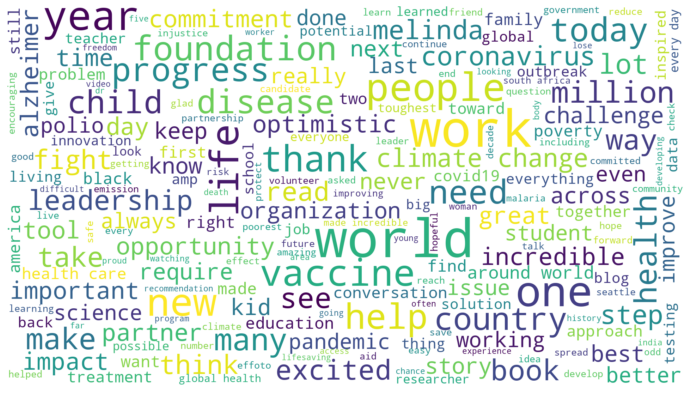

In [9]:
# Plot the word cloud 
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in df['cleaned_tweet']])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_tweet_wordcloud.png')
plt.show()

In [10]:
#removing whitespaces
#split names for counter
def split_name(cleaned_tweet):
    split = str(cleaned_tweet).split()
    return split

tweets_count_list = []
for x in cleaned_tweet_list:
    for y in split_name(x):
        tweets_count_list.append(y)

In [11]:
#let's see top 25 used words by host to name their listing
top_25_tweets = Counter(tweets_count_list).most_common()
top_25_tweets = top_25_tweets[0:25]

In [12]:
#now let's put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_tweets)
sub_plot.rename(columns={0:'Tweet Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'world'),
 Text(0, 0, 'work'),
 Text(0, 0, 'one'),
 Text(0, 0, 'health'),
 Text(0, 0, 'year'),
 Text(0, 0, 'life'),
 Text(0, 0, 'people'),
 Text(0, 0, 'vaccine'),
 Text(0, 0, 'new'),
 Text(0, 0, 'help'),
 Text(0, 0, 'foundation'),
 Text(0, 0, 'today'),
 Text(0, 0, 'get'),
 Text(0, 0, 'need'),
 Text(0, 0, 'progress'),
 Text(0, 0, 'disease'),
 Text(0, 0, 'child'),
 Text(0, 0, 'country'),
 Text(0, 0, 'make'),
 Text(0, 0, 'many'),
 Text(0, 0, 'million'),
 Text(0, 0, 'climate'),
 Text(0, 0, 'see'),
 Text(0, 0, 'day'),
 Text(0, 0, 'book')]

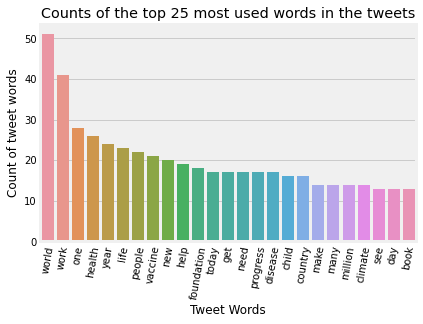

In [13]:
#we are going to use barplot for this visualization
viz_1=sns.barplot(x='Tweet Words', y='Count', data=sub_plot)
viz_1.set_title('Counts of the top 25 most used words in the tweets')
viz_1.set_ylabel('Count of tweet words')
viz_1.set_xlabel('Tweet Words')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

In [14]:
# Export dataframe to Excel File 
writer = pd.ExcelWriter('SMA_Assignment_DF_Clean.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()